In [4]:
### 6.5.1 图像数据的读入
import numpy as np
import pandas as pd
import os

print(os.listdir("./dataset/images/Images"))

['n02085782-Japanese_spaniel', 'n02086079-Pekinese', 'n02085936-Maltese_dog', 'n02086646-Blenheim_spaniel', 'n02088238-basset', 'n02085620-Chihuahua', 'n02086910-papillon', 'n02086240-Shih-Tzu', 'n02087046-toy_terrier', 'n02088094-Afghan_hound']


In [5]:
# 本示例处理10种狗
dir = './dataset/images/Images/'
chihuahua_dir = dir + 'n02085620-Chihuahua'  # 吉娃娃
japanese_spaniel_dir = dir + 'n02085782-Japanese_spaniel'  # 日本狆
maltese_dir = dir + 'n02085936-Maltese_dog'  #马尔济斯犬
pekinese_dir = dir + 'n02086079-Pekinese'  #北京狮子狗
shitzu_dir = dir + 'n02086240-Shih-Tzu'  #西施犬
blenheim_spaniel_dir = dir + 'n02086646-Blenheim_spaniel'  #英国可卡犬
papillon_dir = dir + 'n02086910-papillon'  #蝴蝶犬
toy_terrier_dir = dir + 'n02087046-toy_terrier'  #玩具猎狐梗
afghan_hound_dir = dir + 'n02088094-Afghan_hound'  #阿富汗猎犬
basset_dir = dir + 'n02088238-basset'  #巴吉度猎犬

In [6]:
import cv2  # 导入Open CV工具箱

X = []
y_label = []
imgsize = 150


# 定义一个函数读入狗的图片
def training_data(label, data_dir):
    print("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        X.append(np.array(img))
        y_label.append(str(label))


# 读入10个目录中的狗狗图片
training_data('chihuahua', chihuahua_dir)
training_data('japanese_spaniel', japanese_spaniel_dir)
training_data('maltese', maltese_dir)
training_data('pekinese', pekinese_dir)
training_data('shitzu', shitzu_dir)
training_data('blenheim_spaniel', blenheim_spaniel_dir)
training_data('papillon', papillon_dir)
training_data('toy_terrier', toy_terrier_dir)
training_data('afghan_hound', afghan_hound_dir)
training_data('basset', basset_dir)

正在读入： ./dataset/images/Images/n02085620-Chihuahua
正在读入： ./dataset/images/Images/n02085782-Japanese_spaniel
正在读入： ./dataset/images/Images/n02085936-Maltese_dog
正在读入： ./dataset/images/Images/n02086079-Pekinese
正在读入： ./dataset/images/Images/n02086240-Shih-Tzu
正在读入： ./dataset/images/Images/n02086646-Blenheim_spaniel
正在读入： ./dataset/images/Images/n02086910-papillon
正在读入： ./dataset/images/Images/n02087046-toy_terrier
正在读入： ./dataset/images/Images/n02088094-Afghan_hound
正在读入： ./dataset/images/Images/n02088238-basset


In [7]:
from sklearn.preprocessing import LabelEncoder  # 导入标签编码工具
from keras.utils.np_utils import to_categorical  # 导入One-hot编码工具

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label)  # 标签编码
y = to_categorical(y, 10)  # 将标签转换为One-hot编码
X = np.array(X)  # 将X从列表转换为张量数组
X = X / 255  # 将X张量归一化

2023-07-02 10:24:41.645561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
print('X张量的形状：', X.shape)
print('X张量的第一个数据：', X[1])

X张量的形状： (1922, 150, 150, 3)
X张量的第一个数据： [[[0.02745098 0.02352941 0.03921569]
  [0.02745098 0.02352941 0.03921569]
  [0.02745098 0.02352941 0.03921569]
  ...
  [0.03137255 0.02745098 0.03529412]
  [0.03137255 0.02745098 0.03529412]
  [0.03137255 0.01960784 0.02745098]]

 [[0.02745098 0.02352941 0.03921569]
  [0.02745098 0.02352941 0.03921569]
  [0.02352941 0.01960784 0.03529412]
  ...
  [0.02352941 0.01960784 0.02745098]
  [0.02352941 0.01960784 0.02745098]
  [0.02745098 0.01568627 0.02352941]]

 [[0.02745098 0.02352941 0.03921569]
  [0.02745098 0.02352941 0.03921569]
  [0.02745098 0.02352941 0.03921569]
  ...
  [0.01568627 0.01176471 0.01960784]
  [0.01568627 0.01176471 0.01960784]
  [0.02352941 0.01176471 0.01960784]]

 ...

 [[0.70980392 0.71372549 0.75294118]
  [0.70980392 0.71372549 0.75294118]
  [0.69411765 0.69803922 0.7372549 ]
  ...
  [0.76078431 0.74509804 0.76470588]
  [0.78431373 0.76862745 0.78823529]
  [0.76862745 0.75686275 0.76470588]]

 [[0.70196078 0.70588235 0.74509804

In [9]:
print('y张量的形状：', y.shape)
print('y张量的第一个数据：', y[1])

y张量的形状： (1922, 10)
y张量的第一个数据： [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


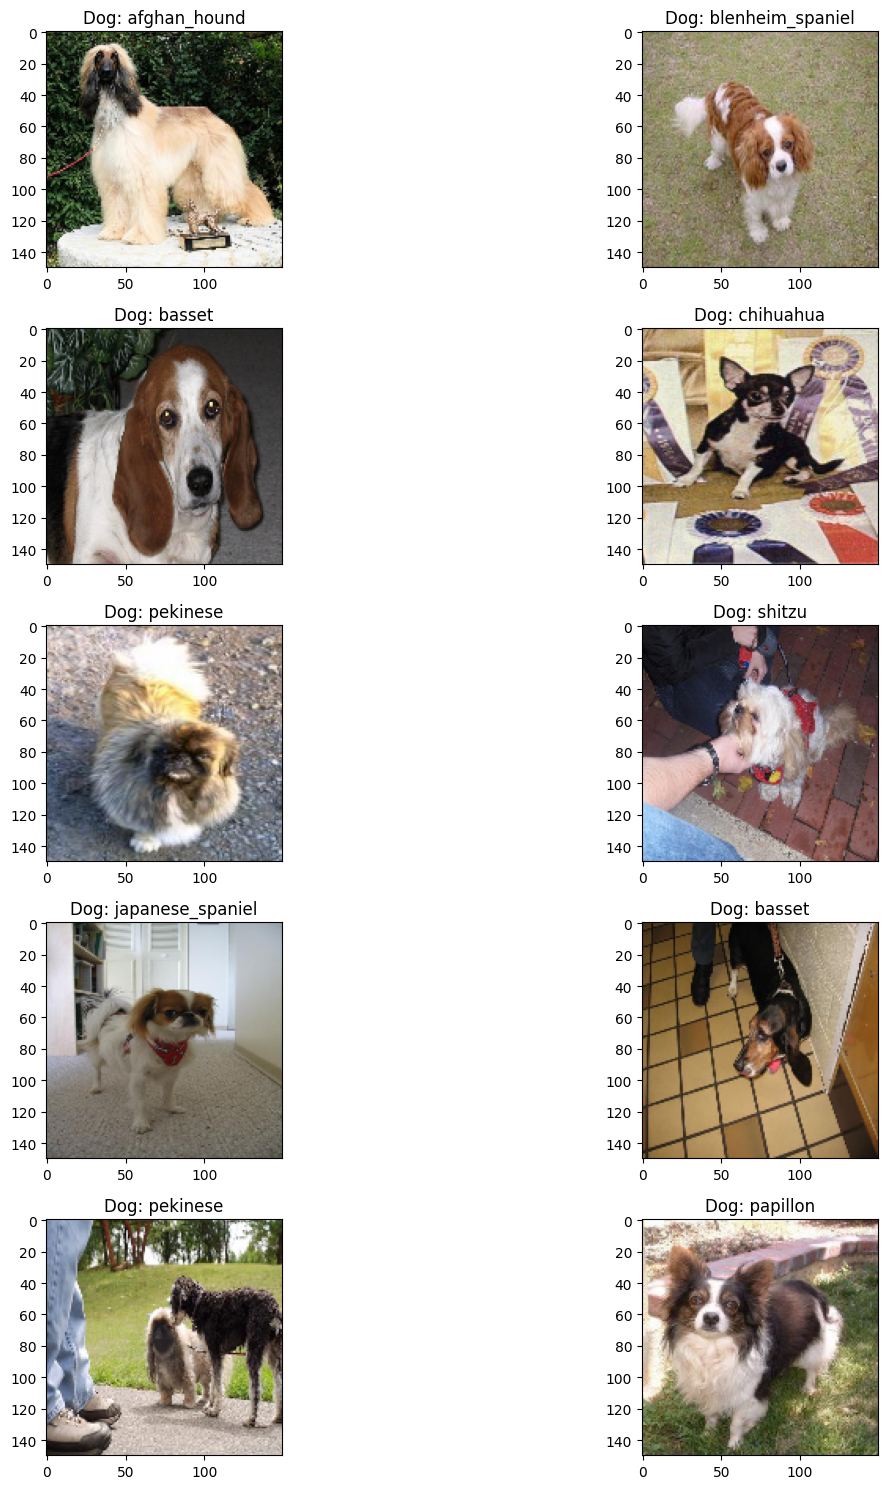

In [10]:
import matplotlib.pyplot as plt  # 导入matplotlib
import random as rdm  # 导入随机数工具

# 随机显示几张可爱的狗狗图片吧
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0, len(X))
        X[r] = X[r][..., ::-1]  #将图像通道从BGR调整为RGB，防止色彩失真
        ax[i, j].imshow(X[r])
        ax[i, j].set_title('Dog: ' + y_label[r])
plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split  # 导入拆分工具

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [12]:
from keras import layers  # 导入所有层
from keras import models  # 导入所有模型

cnn = models.Sequential()  # 贯序模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',  # 卷积
                      input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))  # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 卷积
cnn.add(layers.MaxPooling2D((2, 2)))  # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 卷积
cnn.add(layers.MaxPooling2D((2, 2)))  # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 卷积
cnn.add(layers.MaxPooling2D((2, 2)))  # 最大池化
cnn.add(layers.Flatten())  # 展平
cnn.add(layers.Dense(512, activation='relu'))  # 全连接
cnn.add(layers.Dense(10, activation='softmax'))  # 分类输出
cnn.compile(loss='categorical_crossentropy',  # 损失函数
            optimizer='RMSprop',  # 优化器
            metrics=['acc'])  # 评估指标

In [13]:
history = cnn.fit(X_train, y_train,  # 指定训练集
                  epochs=50,  # 指定轮次
                  batch_size=256,  # 指定批量大小
                  validation_data=(X_test, y_test))  # 指定验证集

Epoch 1/50
7/7 [==============================] - 25s 3s/step - loss: 2.3014 - acc: 0.1334 - val_loss: 4.4679 - val_acc: 0.1351
Epoch 2/50
7/7 [==============================] - 23s 3s/step - loss: 2.6160 - acc: 0.1522 - val_loss: 2.2996 - val_acc: 0.0987
Epoch 3/50
7/7 [==============================] - 20s 3s/step - loss: 2.2891 - acc: 0.1126 - val_loss: 4.8788 - val_acc: 0.1195
Epoch 4/50
7/7 [==============================] - 20s 3s/step - loss: 2.7093 - acc: 0.1776 - val_loss: 2.2824 - val_acc: 0.1299
Epoch 5/50
7/7 [==============================] - 21s 3s/step - loss: 2.2387 - acc: 0.1802 - val_loss: 6.7821 - val_acc: 0.1351
Epoch 6/50
7/7 [==============================] - 20s 3s/step - loss: 2.9439 - acc: 0.1815 - val_loss: 2.3484 - val_acc: 0.1169
Epoch 7/50
7/7 [==============================] - 22s 3s/step - loss: 2.2052 - acc: 0.1874 - val_loss: 3.2588 - val_acc: 0.0935
Epoch 8/50
7/7 [==============================] - 22s 3s/step - loss: 2.3684 - acc: 0.2121 - val_loss: 2

In [14]:
 # 显示训练过程中的学习曲线
def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

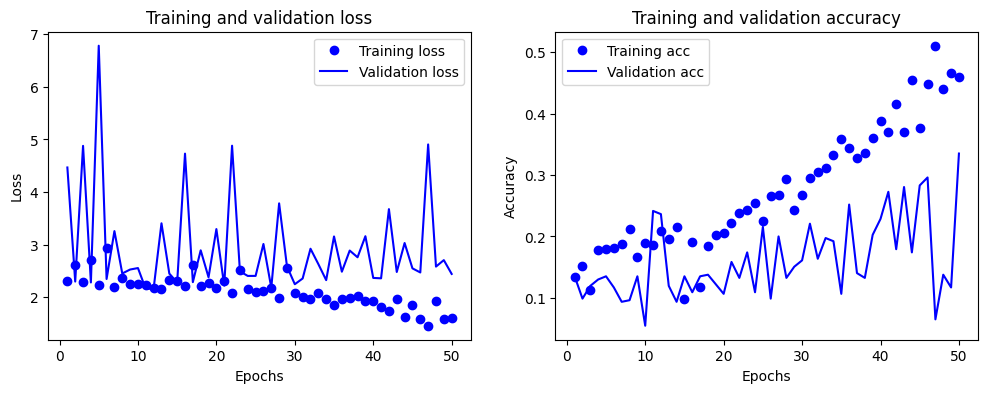

In [15]:
show_history(history)

In [16]:
from keras.models import load_model  # 导入模型保存工具

cnn.save('../my_dog_cnn.h5')  # 创建一个HDF5格式的文件'my_dog_cnn.h5'
del cnn  # 删除当前模型
cnn = load_model('../my_dog_cnn.h5')  # 重新载入已经保存的模型

1/1 [==============================] - 0s 148ms/step


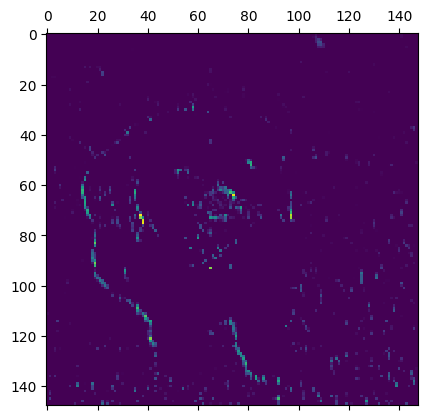

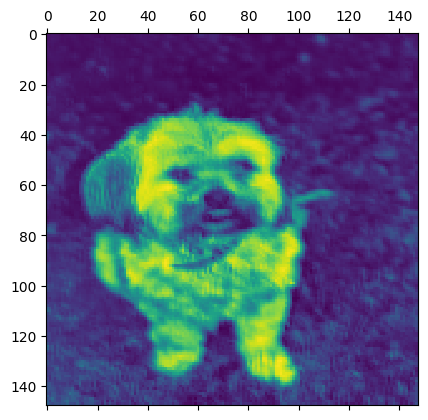

In [17]:
from keras.models import load_model  # 导入模型保存工具
import matplotlib.pyplot as plt  # 导入matplotlib

model = load_model('../my_dog_cnn.h5')  # 载入刚才保存的模型
# 绘制特征通道
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[0]
image = image.reshape(1, 150, 150, 3)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')